1. Search after 'Copenhagen schools' on https://google.com and press the button 'show more addresses' with selenium.
2. Webscrape the title, phone number and stars of all pages.
3. Show a bar plot with stars as y-axis and name, phone number as x-axis in descending order.


Text(0.5, 1.0, 'Titles and phones from search')

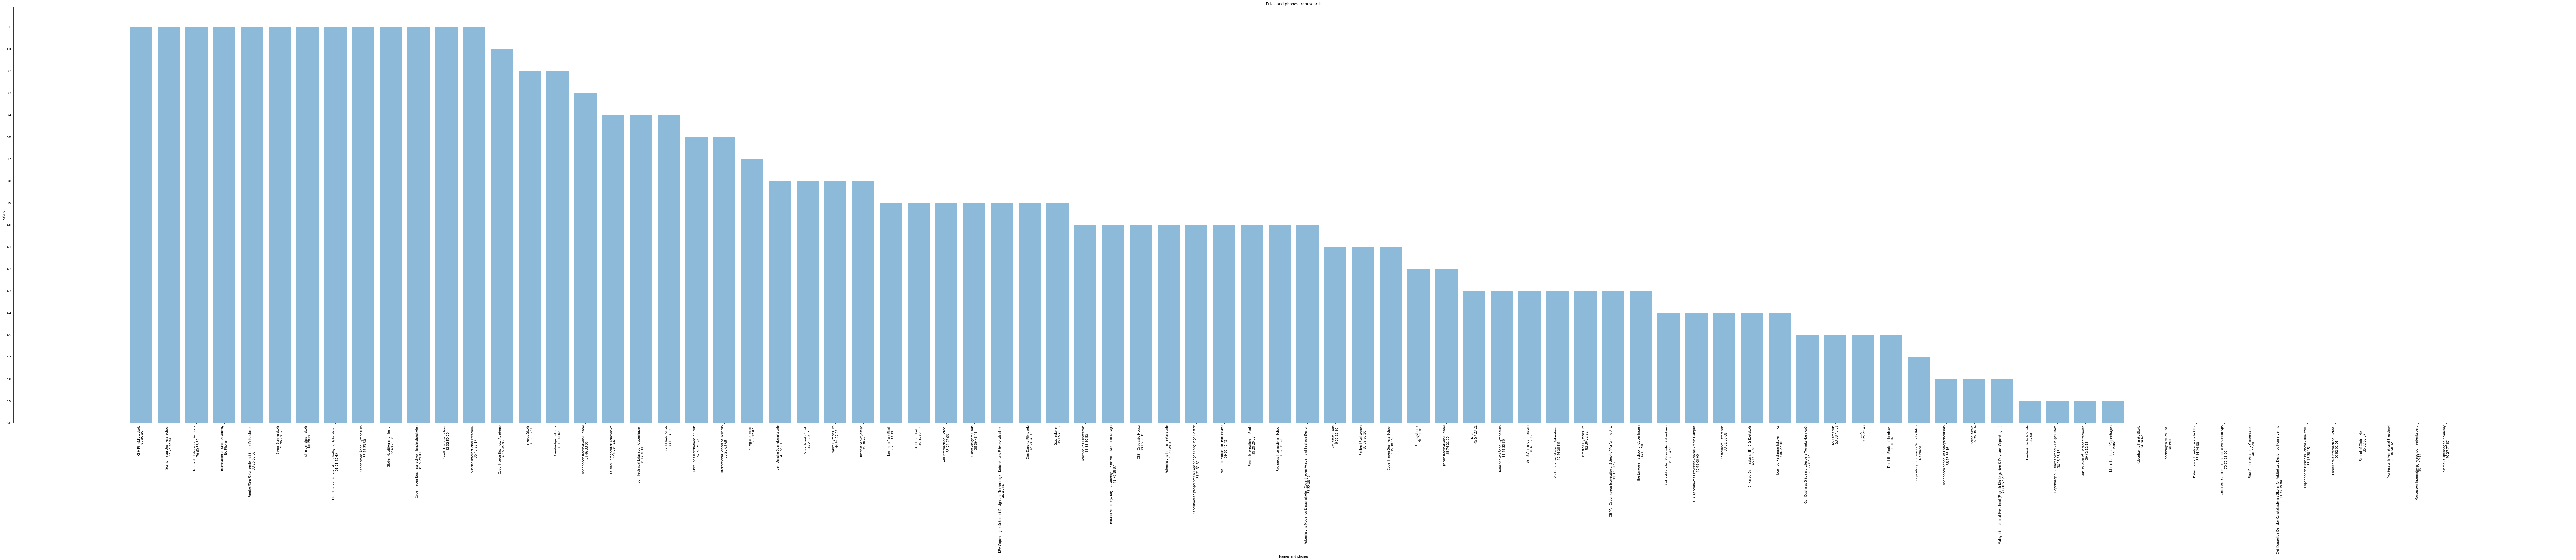

In [32]:
from selenium import webdriver
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from selenium.common.exceptions import NoSuchElementException
from time import sleep
import bs4
import re
import matplotlib.pyplot as plt

def get_result_info_of_page(page_source):
    soup = bs4.BeautifulSoup(page_source, 'html.parser')
    result = {}
    for elem in soup.find_all("div", {"class": "cXedhc"}):
        title = elem.find('div', {'class' : 'dbg0pd'}).find('div').getText()
        details = elem.find('span', {'class' : 'rllt__details'})
        phone_reg = re.compile(r'\d{2} \d{2} \d{2} \d{2}')
        phones = phone_reg.search(details.getText())
        stars = details.find('span', {'class' : 'BTtC6e'})
        result[title] = (phones.group() if phones != None else 'No Phone', stars.getText() if stars != None else '0')
    return result

options = webdriver.FirefoxOptions() 
options.add_argument("start-maximized")
options.add_argument('disable-infobars')
binary = FirefoxBinary('/Applications/Firefox Developer Edition.app/Contents/MacOS/firefox-bin')
browser = webdriver.Firefox(firefox_binary=binary)

browser.get('https://www.google.com')
browser.implicitly_wait(3)

search_field = browser.find_element_by_name('q')
search_field.send_keys('Copenhagen schools')
search_field.submit()
browser.find_element_by_class_name('i0vbXd').click()
sleep(1)
search_results = {}
search_results = {**search_results, **get_result_info_of_page(browser.page_source)}

page = 2
while True:
    try:
        browser.find_element_by_xpath("//a[@aria-label='Page {}']".format(page)).click()
    except NoSuchElementException:
        break
    sleep(3)
    search_results = {**search_results, **get_result_info_of_page(browser.page_source)}
    page += 1
browser.quit()


dataSorted = {k: v for k, v in sorted(search_results.items(), key=lambda item: item[1][1], reverse=True)}
xBar = []
for idx in dataSorted:
    xBar.append(idx + '\n ' + dataSorted[idx][0])


plt.figure(figsize=(150, 25))
plt.bar(xBar, [val[1] for val in dataSorted.values()], align='center', alpha=0.5,)
plt.gca().invert_xaxis()
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.xlabel('Names and phones')
plt.title('Titles and phones from search')